In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 80)
pd.set_option("display.width", 200)

# Path to the new aggregated file
path = r"E:\client_features_corrected.csv"
try:
    df = pd.read_csv(path, sep=";", dtype=str)
    print("Loaded rows:", len(df))
    try:
        display(df.head(5)) 
    except NameError:
        print(df.head(5))  
except FileNotFoundError:
    print(f"Error: File not found at {path}")
    raise

Loaded rows: 1974078


,isActive,hasRefunded,hasSubscribed,dailyLoanCount,promoLoanCount,debt,clientMaxAmount,subscriptionAmount,dueAmount,totalRefunded,clientID,subscriptionDate,bankId,reSubscriptionDate,language,unsubscriptionDate,penaltyDebt,firstName,lastName,dateOfBirth,placeOfBirth,loanAmount_sum,loanAmount_mean,loanAmount_max,loanAmount_count,avg_refunds_per_loan,avg_on_time_refund_ratio,avg_penalty_refund_ratio,corrected_refund_ratio,penaltyAmount_sum,days_to_last_refund_mean,amountwithInterest_sum,amount_sum,amount_count,amount_mean,avg_loan_size,penalty_ratio
0,True,True,True,0,0,0.0,25000.0,300.0,0.0,0.0,683755851,07/11/2023,11,26/01/2025,0,2026-05-14 23:00:00.000,0.0,GABIN,BRISTOL SAMO NJIKE,19/02/1998,xxx,139933.0,12721.181818181818,54000.0,11,1.2727272727272727,0.0,0.0,0.36363636363636365,55000.0,32.09090909090909,149428.0,25312.0,9,2812.4444444444443,12721.181818181818,0.3930424342904512
1,True,True,True,0,0,0.0,2000.0,300.0,0.0,0.0,671846141,07/11/2023,NaN,07/11/2023,1,NaN,0.0,N A,RAMATOU MUSA,02/02/1994,xxx,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,True,True,True,0,0,579.0,500.0,300.0,538.0,0.0,673587463,07/11/2023,9,12/09/2025,0,2026-09-29 23:00:00.000,0.0,GODWIN,BANTAR,14/12/1988,xxx,167018.0,13918.166666666666,31500.0,12,0.3333333333333333,0.0,0.0,0.16666666666666666,60000.0,9.166666666666666,178233.0,42372.0,4,10593.0,13918.166666666666,0.35924056544465
3,True,False,True,0,0,9988.0,8805.0,300.0,9460.0,182.0,681126794,07/11/2023,3,07/11/2023,1,2024-11-07 23:00:00.000,5000.0,KEVIN,SIMO FOSOT,17/11/1998,xxx,38600.0,7720.0,8800.0,5,0.0,0.0,0.0,0.0,25000.0,0.0,40520.0,0.0,0,0.0,7720.0,0.6476516152431284
4,True,False,True,0,0,2418.0,9654.0,300.0,3225.0,1049.0,654758551,07/11/2023,3,07/11/2023,0,2024-11-08 23:00:00.000,5000.0,Keneth Zuh,Kechah,13/05/1996,xxx,27500.0,3437.5,6000.0,8,1.375,0.0,0.0,0.25,40000.0,29.0,29563.0,7479.0,11,679.9090909090909,3437.5,1.454492563906767


In [2]:
# Inspect columns and data types
if df.empty:
    raise ValueError("DataFrame is empty!")
print("Columns:\n", df.columns.tolist())
print("\nData Info:")
try:
    display(df.info())
except NameError:
    print(df.dtypes)

Columns:
 ['isActive', 'hasRefunded', 'hasSubscribed', 'dailyLoanCount', 'promoLoanCount', 'debt', 'clientMaxAmount', 'subscriptionAmount', 'dueAmount', 'totalRefunded', 'clientID', 'subscriptionDate', 'bankId', 'reSubscriptionDate', 'language', 'unsubscriptionDate', 'penaltyDebt', 'firstName', 'lastName', 'dateOfBirth', 'placeOfBirth', 'loanAmount_sum', 'loanAmount_mean', 'loanAmount_max', 'loanAmount_count', 'avg_refunds_per_loan', 'avg_on_time_refund_ratio', 'avg_penalty_refund_ratio', 'corrected_refund_ratio', 'penaltyAmount_sum', 'days_to_last_refund_mean', 'amountwithInterest_sum', 'amount_sum', 'amount_count', 'amount_mean', 'avg_loan_size', 'penalty_ratio']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974078 entries, 0 to 1974077
Data columns (total 37 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   isActive                  object
 1   hasRefunded               object
 2   hasSubscribed             object
 3   dailyL

None

In [3]:
# Convert numeric & date fields
num_cols = [
    "loanAmount_sum", "loanAmount_max", "loanAmount_mean", "loanAmount_count",
    "amount_sum", "amount_mean", "amount_count", "dueAmount", "penaltyDebt",
    "clientMaxAmount", "penaltyAmount_sum", "avg_refunds_per_loan",
    "avg_on_time_refund_ratio", "avg_penalty_refund_ratio", "corrected_refund_ratio",
    "days_to_last_refund_mean", "amountwithInterest_sum", "avg_loan_size", "penalty_ratio"
]

# Convert numeric safely
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)
    else:
        df[c] = 0.0

# Convert dates (only if relevant)
date_cols = ["subscriptionDate", "reSubscriptionDate", "unsubscriptionDate"]
for d in date_cols:
    if d in df.columns:
        df[d] = pd.to_datetime(df[d], errors="coerce", dayfirst=True)

# Ensure clientID
if "clientID" not in df.columns:
    raise KeyError("No clientID column found in dataset!")

print("Numeric and Date Conversion Done")
try:
    display(df[num_cols[:8]].head(3))
except NameError:
    print(df[num_cols[:8]].head(3))

C:\Users\Pro\AppData\Local\Temp\ipykernel_10384\4040519141.py:21: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[d] = pd.to_datetime(df[d], errors="coerce", dayfirst=True)


Numeric and Date Conversion Done


,loanAmount_sum,loanAmount_max,loanAmount_mean,loanAmount_count,amount_sum,amount_mean,amount_count,dueAmount
0,139933.0,54000.0,12721.181818,11,25312.0,2812.444444,9,0.0
1,0.0,0.0,0.000000,0,0.0,0.000000,0,0.0
2,167018.0,31500.0,13918.166667,12,42372.0,10593.000000,4,538.0


In [4]:

df_fe = df.copy()

# --- Refund quality base ---
# not used for scoring 
df_fe["refund_base"] = df_fe.get("corrected_refund_ratio", 0)

# --- Time Quality (from avg_on_time_refund_ratio) ---
def compute_time_quality(row):
    r = row.get("avg_on_time_refund_ratio", 0)
    if r >= 0.5: return 1.0
    elif r >= 0.1: return 0.8
    return 0.7

df_fe["time_quality"] = df_fe.apply(compute_time_quality, axis=1)

# --- Combined refund behavior ---
# not used for scoring 
df_fe["refund_per_loan"] = (df_fe["refund_base"] * df_fe["time_quality"]).clip(0, 1)

# --- Average Transaction Value ---
# not used for scoring 
df_fe["avg_tx_value"] = df_fe["amount_sum"] / df_fe["amount_count"].clip(lower=1)

# --- Penalty missing flag (loan > 0 but penalty = 0) ---
# not used for scoring 
df_fe["penalty_missing_flag"] = (
    (df_fe["loanAmount_sum"] > 0) & (df_fe["penalty_ratio"] == 0)
).astype(int)

# --- Clean NaN/Inf ---
df_fe = df_fe.replace([np.inf, -np.inf], 0).fillna(0)

print("Feature Engineering + Penalty Check Done")
display(df_fe[[
    "clientID","avg_loan_size","refund_per_loan","avg_tx_value",
    "penalty_ratio","penalty_missing_flag"
]].head(10))


Feature Engineering + Penalty Check Done


,clientID,avg_loan_size,refund_per_loan,avg_tx_value,penalty_ratio,penalty_missing_flag
0,683755851,12721.181818,0.254545,2812.444444,0.393042,0
1,671846141,0.000000,0.000000,0.000000,0.000000,0
2,673587463,13918.166667,0.116667,10593.000000,0.359241,0
3,681126794,7720.000000,0.000000,0.000000,0.647652,0
4,654758551,3437.500000,0.175000,679.909091,1.454493,0
5,651250572,2345.583333,0.000000,0.000000,2.131590,0
6,650482240,4680.875000,0.200097,2069.923077,1.068167,0
7,652987653,9458.333333,0.145833,4748.500000,0.528632,0
8,677289119,13200.000000,0.140000,3132.250000,0.378785,0
9,672454716,82333.333333,0.000000,5500.000000,0.060728,0


In [5]:

def momo_linear_score(row):
    # --- Normalized features ---
    x1 = np.log1p(row["avg_loan_size"]) / 10_000
    x2 = np.clip(row["avg_refunds_per_loan"], 0, 2) / 2
    x3 = np.log1p(row["amount_mean"]) / 10_000
    x4 = np.clip(row["penalty_ratio"], 0, 5) / 5
    x5 = np.clip(row["corrected_refund_ratio"], 0, 1)

    # --- Weighted linear score ---
    S_raw = (
        2.5 * x1 + 3.0 * x2 + 2.0 * x3
        - 3.5 * x4 + 3.0 * x5 - 0.5
    )

    # --- Logistic normalization to [0–1] ---
    S_norm = 1 / (1 + np.exp(-S_raw))
    score = 500 + 9500 * S_norm

    # --- Uncertainty penalty for missing penalties ---
    if row.get("penalty_missing_flag", 0) == 1:
        score -= 300

    # --- Handle new clients (no loan history) ---
    if row.get("loanAmount_sum", 0) == 0:
        # Instead of fixed baseline, infer from their activity level:
        score = 500 + 9500 * (0.4 + 0.2 * x3)  # mild increase if active

    return round(np.clip(score, 500, 10000), 2)

df_fe["credit_score"] = df_fe.apply(momo_linear_score, axis=1)

print("Deterministic Linear-Model Scoring Done")
display(df_fe[[
    "clientID","avg_loan_size","avg_refunds_per_loan",
    "amount_mean","penalty_ratio","corrected_refund_ratio",
    "penalty_missing_flag","credit_score"
]].head(10))


Deterministic Linear-Model Scoring Done


,clientID,avg_loan_size,avg_refunds_per_loan,amount_mean,penalty_ratio,corrected_refund_ratio,penalty_missing_flag,credit_score
0,683755851,12721.181818,1.272727,2812.444444,0.393042,0.363636,0,9076.68
1,671846141,0.000000,0.000000,0.000000,0.000000,0.000000,0,4300.00
2,673587463,13918.166667,0.333333,10593.000000,0.359241,0.166667,0,5847.15
3,681126794,7720.000000,0.000000,0.000000,0.647652,0.000000,0,3147.27
4,654758551,3437.500000,1.375000,679.909091,1.454493,0.250000,0,7961.75
5,651250572,2345.583333,0.000000,0.000000,2.131590,0.000000,0,1642.27
6,650482240,4680.875000,0.625000,2069.923077,1.068167,0.285853,0,6526.45
7,652987653,9458.333333,1.000000,4748.500000,0.528632,0.208333,0,7899.01
8,677289119,13200.000000,0.400000,3132.250000,0.378785,0.200000,0,6275.82
9,672454716,82333.333333,0.000000,5500.000000,0.060728,0.000000,0,4002.30


In [6]:
# Cell 6 – Classification
bins = [0, 3000, 5000, 7000, 8500, 10000]
labels = ["E", "D", "C", "B", "A"]

df_fe["credit_class"] = pd.cut(df_fe["credit_score"], bins=bins, labels=labels)
print("Classification complete.")
display(df_fe[["clientID", "credit_score", "credit_class"]].head(15))


Classification complete.


,clientID,credit_score,credit_class
0,683755851,9076.68,A
1,671846141,4300.00,D
2,673587463,5847.15,C
3,681126794,3147.27,D
4,654758551,7961.75,B
5,651250572,1642.27,E
6,650482240,6526.45,C
7,652987653,7899.01,B
8,677289119,6275.82,C
9,672454716,4002.30,D


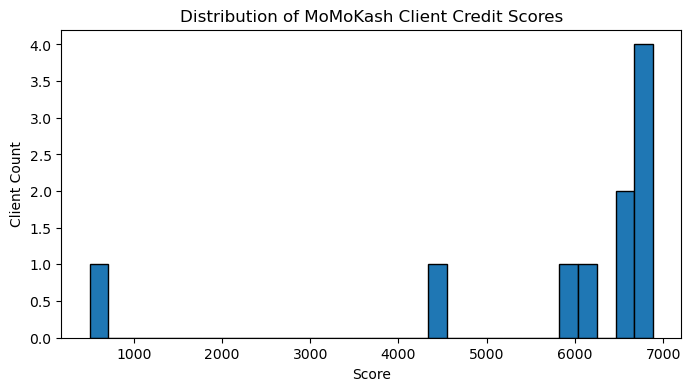

In [18]:
# cell 7 This is for visualization
plt.figure(figsize=(8,4))
plt.hist(df_fe["credit_score"], bins=30, edgecolor="k")
plt.title("Distribution of MoMoKash Client Credit Scores")
plt.xlabel("Score")
plt.ylabel("Client Count")
plt.show()
